In [1]:
!pip3 install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy import stats
import math

# Normalizing flows

Starts with a Gaussian curve (or a simple curve)

$$ z \sim N(0, 1) $$

In [30]:
t = np.arange(-4, 4, 0.1)

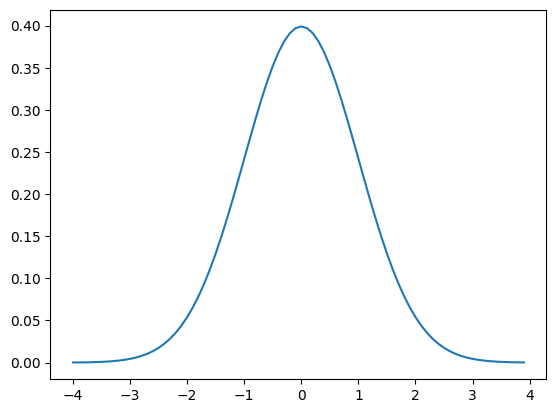

In [31]:
z = stats.norm.pdf(t, 0, 1)
plt.plot(t, z)

We apply bijectors, or an invertible function on the distribution to transform the curve

$$ x = f(z) $$

or 

$$ f: Z \rightarrow X $$

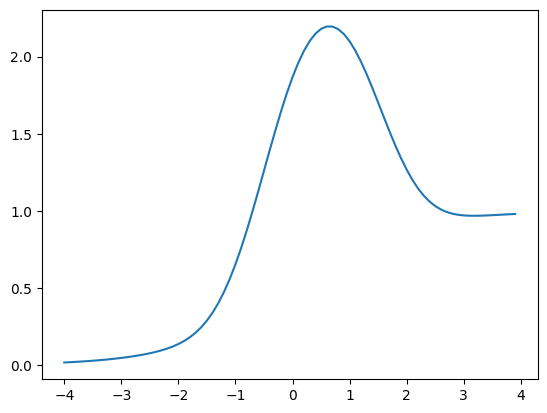

In [38]:

# Here I'm using a hardcoded function, but you'd usually use a neural network.
def f(z):
	tmp = np.exp(-np.square(z))
	tmp += np.exp(-np.square(z - 1))
	tmp += 1 / (1 + np.exp(-z))

	return tmp

x = f(z)
plt.plot(t, x)

This $f$ is a learned function with the Masked Autoencoder for Density Estimation model. This way, our neural networks transforms towards a target distribution.

By the change of variables: $ g(x) = g(z) \left| J(z) \right|$

$$ p(x) = p(z) \left| det \frac{\partial z}{\partial x} \right| $$

We know that $p(z)$ is a probability distribution. The Jacobian stretches and changes at every location of $z$. The Jacobian also should ensure that the resulting probability distribution is normalized.


Now we just do the same multiple times. Transform multiple times on a bijector Chain.

$$ x = f_n \cdot ... \cdot f_2 \cdot f_1(z) $$




The ultimate probability distribution is just a 1 dimensional conditional bayes net. It is all dependent on the previous events

$$ p(x_1, ..., x_n) = \prod_i^n p(x_i | x_{i < d})

In [ ]:
# conditional normalizing flow